# HOMEWORK 1 - BEGINNERS

### TEAM F
Chouliarias Andreas 2143

Matzoros Christos-Konstantinos 2169

Pappas Apostolos 2109


## Exercise 2

### Fitting the polynomial

In Exercise 2, we first produce the dataset to be used (it will be a second-order polynomial). This is shown bellow:


In [23]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Producing the dataset 
x = np.random.rand(100,1)
y = 5*x*x + 0.1*np.random.randn(100,1) # Second-order polynomial

Continuing, we compute the parametrization of the data set fitting a second-order
polynomial using our own code:

Comparison between regression parameters with and without the use of sklearn:  

(without sklearn)
 Intercept:   -0.78241863
 Slope:       4.97074536


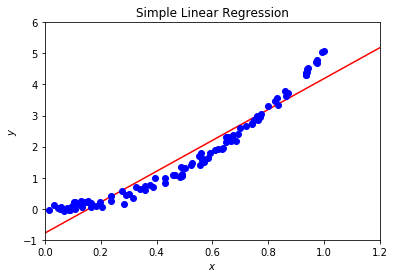

In [25]:
xb = np.c_[np.ones((100,1)), x]
beta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y) # Regression parameters


print("Comparison between regression parameters with and without the use of sklearn:  \n")
temp = str(beta[0])
print("(without sklearn)\n Intercept:  ",temp.replace("[", "").replace("]", ""))
temp = str(beta[1])
print(" Slope:      ", temp.replace("[", "").replace("]", ""))


xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'bo')
plt.axis([0,1.2,-1, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()


We then use scikit-learn and compare its results to ours: 


 
(with sklearn)
 Intercept:   -0.78241863
 Slope:       4.97074536


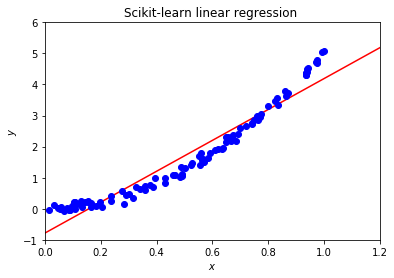

In [26]:
linreg = LinearRegression()
linreg.fit(x,y) # Fit the second-order polynomial

temp = str(linreg.intercept_)
print("\n \n(with sklearn)\n Intercept:  ", temp.replace("[", "").replace("]", ""))
temp = str(linreg.coef_)
print(" Slope:      ", temp.replace("[", "").replace("]", ""))

xnew = np.array([[0],[2]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'bo')
plt.axis([0,1.2,-1, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Scikit-learn linear regression ')
plt.show()

### Reviewing the Regression model

In order to review the Regression model constructed above, we can compute metrics and statistics such as the Mean Squared Error (MSE) and the r-squared.

$$MSE(y, \hat{y}) = \frac{1}{n}\sum_{i = 0}^{n-1}{(y_i - \hat{y_i})^2}$$

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i = 0}^{n-1}{(y_i - \hat{y_i})^2}}{\sum_{i = 0}^{n-1}{(y_i - \bar{y_i})^2}}$$

Using the respectable scikit-learn functions, we compute the above statistics:

In [27]:
ypredict = linreg.predict(x)

print("\nMean squared error: %.2f" % mean_squared_error(y, ypredict))
print("\nR-squared: %.2f" % r2_score(y, ypredict))


Mean squared error: 0.15

R-squared: 0.93


The Mean Squared Error is the average squared difference between the target values and what is estimated.<br> A small MSE means that the estimated values are close to the true ones.

The $R^2$ value, or the Coefficient of Determination, is the portion of the total variation in the dependent variable that is explained by variation in the independent variable. In other words, it shows us how well the indepedent variable explains the dependent one.<br> A big $R^2$ value, means that our model succeeds in explaining the depedent variable.

## Exercise 3

For the needs of the third exercise, we need to show the following:
$$Var(\hat{β}) = (\hat{X}^T \hat{X})^{-1}σ^2$$

It is proven that $\hat{β} = (\hat{X}^T \hat{X})^{-1} Χ^Τy$. It is also proven that:

$$ Var(AX) =$$

$$ E[A(X-μ)(Α(Χ-μ))^T] =$$

$$ E[A(X-μ)(Χ-μ)^TA^T] =$$

$$ AE[(X-μ)(Χ-μ)^T]A^T =$$

$$AVar(X)A^T$$

Where A is a $k*l$ constant matrix.

$$ Var(\hat{β}) =$$

$$ Var((\hat{X}^T \hat{X})^{-1} Χ^Τy) =$$

$$ (\hat{X}^T \hat{X})^{-1} Χ^Τ Var(y) [(\hat{X}^T \hat{X})^{-1} Χ^Τ]^T =$$

We know that $Var(y) = σ^2, thus: $

$$ (\hat{X}^T \hat{X})^{-1} \hat{Χ}^Τ σ^2 [(\hat{X}^T \hat{X})^{-1} \hat{Χ}^Τ]^T =$$

$$ (\hat{X}^T \hat{X})^{-1} \hat{Χ}^Τ [(\hat{X}^T \hat{X})^{-1} \hat{Χ}^Τ]^Tσ^2 =$$

$$ (\hat{X}^T \hat{X})^{-1} \hat{Χ}^Τ \hat{X}(\hat{X}^T \hat{X})^{-1}σ^2 =$$

$$ (\hat{X}^T \hat{X})^{-1}σ^2$$